# Linear Regression
I heared the term too many time so decided to do a python implementation so that i can undertand it better

### What is it?
Linear regression is a statistical method for modeling relationships between a dependent variable(Output/Target) with a given set of independent variables(Features/The data we alread have).

#### Single Variable Linear Regression
y = a+bx

Question?.<br>
You have a salary distrbution data. what is the best salary for a person with X experience?<br>
<a href="https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_data.csv">Download Dataset Here</a>

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("Datasets/salary_data.csv",encoding="utf-8")
df.head(4)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525


In [8]:
x_features = df["YearsExperience"].tolist()
y_target = df["Salary"].tolist()

In [10]:
print(f"lenght of dataset : {len(x_features)}")

lenght of dataset : 30


### Visualize the dataset using scatter plot
scatter plot need two array variables of same lenght

In [13]:
import matplotlib.pyplot as plt

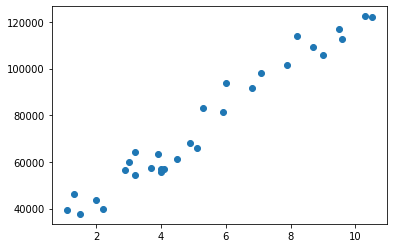

In [14]:
plt.scatter(x_features,y_target)
plt.show()

## Lets Refresh some math

<a href="https://www.khanacademy.org/math/algebra/x2f8bb11595b61c86:forms-of-linear-equations/x2f8bb11595b61c86:intro-to-slope-intercept-form/a/introduction-to-slope-intercept-form">About slope and y-intercept</a><br>
y = ax+b <br>
a = slope  Slope is the ratio of the change in y over the change in x between any two points on the line. <br>
b = y-intercept (0,y)

solve for slope
a = change in y / change in x <br>
a = y2-y1 / x2-x1<br>

Linear regression uses the relationship between the data-points to draw a straight line through all them.<br>
This line can be used to predict future values.<br>
#### lets try to mathematically visualize the dataset and find the slope

#### SciPy
```pipenv install scipy``` <br>
SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python

In [16]:
from scipy import stats

In [18]:
%%time
slope, y_intercept, r, p, std_err = stats.linregress(x_features,y_target)

CPU times: total: 0 ns
Wall time: 1.99 ms


r = the coefficient of correlation <br>
Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate).<br>
The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.<br>
Calculated by scipy


In [23]:
print(f"Correlation :{r}")
print(f"y = {slope}x+{y_intercept}")

Correlation :0.9782416184887599
y = 9449.96232145508x+25792.20019866868


In [26]:
mymodel = list(map(lambda x : slope * x + y_intercept, x_features))
# above code takes the x_features as parameter and apply it on the lambda function and returns the calculated value

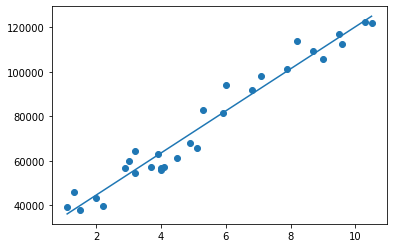

In [27]:
#visualize
plt.scatter(x_features, y_target)
plt.plot(x_features, mymodel)
plt.show() 

In [28]:
#since it is a small dataset and the R value is close to 1 we can use the slope intercept form formula for prediction
def prediction(x):
    return slope*x + y_intercept

In [29]:
#for testing purpose lets give x value from the dataset itself
df.head(4)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525


In [33]:
print(f'y = {df.iloc[0]["YearsExperience"]} -> expected output  = {df.iloc[0]["Salary"]} -> Prediction = {prediction(df.iloc[0]["YearsExperience"])}')
print(f'y = {df.iloc[1]["YearsExperience"]} -> expected output  = {df.iloc[1]["Salary"]} -> Prediction = {prediction(df.iloc[1]["YearsExperience"])}')
print(f'y = {df.iloc[2]["YearsExperience"]} -> expected output  = {df.iloc[2]["Salary"]} -> Prediction = {prediction(df.iloc[2]["YearsExperience"])}')
print(f'y = {df.iloc[3]["YearsExperience"]} -> expected output  = {df.iloc[3]["Salary"]} -> Prediction = {prediction(df.iloc[3]["YearsExperience"])}')

y = 1.1 -> expected output  = 39343.0 -> Prediction = 36187.15875226927
y = 1.3 -> expected output  = 46205.0 -> Prediction = 38077.15121656028
y = 1.5 -> expected output  = 37731.0 -> Prediction = 39967.143680851295
y = 2.0 -> expected output  = 43525.0 -> Prediction = 44692.12484157884


## Now lets use scikit learn to train a linera regression model

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [121]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [106]:
# x_features_array = np.array(x_features).reshape(-1,1)
# y_target_array = np.array(y_target).reshape(-1,1)
#x_train, x_test, y_train, y_test = train_test_split(df["YearsExperience"].values.reshape(-1,1), df["Salary"].values, test_size=0.2, random_state=0) #80 20 split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1].values.reshape(-1,1), df.iloc[:,-1].values, test_size=0.2, random_state=0) #80 20 split

In [107]:
from sklearn.linear_model import LinearRegression # importing Linear Regeression
linear_regression_obj = LinearRegression()

In [108]:
%%time
linear_regression_model = linear_regression_obj.fit(x_train,y_train) # Training
print(f"Intercept - > {linear_regression_model.intercept_}")
print(f"coefficent - > {linear_regression_model.coef_}")

Intercept - > 26780.09915062818
coefficent - > [9312.57512673]
CPU times: total: 0 ns
Wall time: 998 µs


The mean squre value -> the lower the value the better the model<br>
Also R2 means coefficent of determination, 1 means its perfect

In [126]:
from sklearn import metrics
y_pred = linear_regression_model.predict(x_test)
print(f"Root mean square Value - > {np.sqrt(metrics.mean_squared_error(y_test,y_pred,squared=False))}") # this has to be low
print(f"R2 square - > {metrics.r2_score(y_test,y_pred)}")

Root mean square Value - > 59.84128372053313
R2 square - > 0.988169515729126


In [112]:
#prediction
print(f'y = {df.iloc[0]["YearsExperience"]} -> expected output  = {df.iloc[0]["Salary"]} -> Prediction = {linear_regression_model.predict([[df.iloc[0]["YearsExperience"]]])}')
print(f'y = {df.iloc[1]["YearsExperience"]} -> expected output  = {df.iloc[1]["Salary"]} -> Prediction = {linear_regression_model.predict([[df.iloc[1]["YearsExperience"]]])}')
print(f'y = {df.iloc[2]["YearsExperience"]} -> expected output  = {df.iloc[2]["Salary"]} -> Prediction = {linear_regression_model.predict([[df.iloc[2]["YearsExperience"]]])}')
print(f'y = {df.iloc[3]["YearsExperience"]} -> expected output  = {df.iloc[3]["Salary"]} -> Prediction = {linear_regression_model.predict([[df.iloc[3]["YearsExperience"]]])}')

y = 1.1 -> expected output  = 39343.0 -> Prediction = [37023.93179003]
y = 1.3 -> expected output  = 46205.0 -> Prediction = [38886.44681538]
y = 1.5 -> expected output  = 37731.0 -> Prediction = [40748.96184072]
y = 2.0 -> expected output  = 43525.0 -> Prediction = [45405.24940409]


In [113]:
linear_regression_model.predict(x_test)

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

### Now lets do some visualizing 

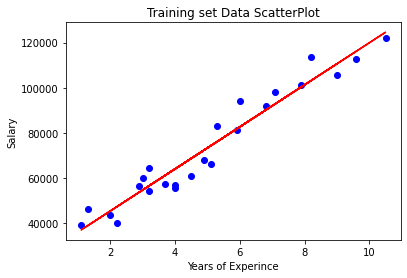

In [115]:
viz_train = plt
viz_train.scatter(x_train, y_train, color='blue')
viz_train.plot(x_train, linear_regression_model.predict(x_train), color='red')
viz_train.title('Training set Data ScatterPlot')
viz_train.xlabel('Years of Experince')
viz_train.ylabel('Salary')
viz_train.show()

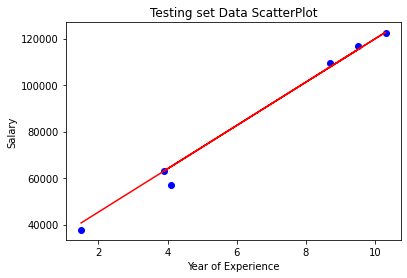

In [116]:
viz_test = plt
viz_test.scatter(x_test, y_test, color='blue')
viz_test.plot(x_test, linear_regression_model.predict(x_test), color='red')
viz_test.title('Testing set Data ScatterPlot')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()